# Clustering

The task of finding underlying coherent groups in the data.

* hard clustering - assign each item to one cluster
* soft clustering - degree of belonging to a cluster
* hierarchical clustering - hierarchy of clusters, usually constructed bottom-to-top

A nice comparison of the clustering algorithms and their results is [here](http://scikit-learn.org/stable/modules/clustering.html#clustering)

Depending on the clustering algorithm, we might need:
* a similarity metric on the items being clustered (function or matrix)
* a way to establish cluster centres
* a way to measure between cluster distance
* a way to measure cluster coherence

A notable difference between the algorithms is whether they can work with a matrix of pairwise similarities between arbitrary objects, or whether they need to be given a vector representation of the data items.

# Vector representations

This is necessarily a quick run through what is ultimately a large and complex topic. In a nutshell:

* There is a method called [word2vec](https://code.google.com/archive/p/word2vec/) (tutorial also [here](http://deeplearning4j.org/word2vec)). 
* This method is capable of producing for each word a high-dimensional vector (usually 50-200 dimensions is a decent choice).
* These vectors are such that words which are semantically related end up having similar vectors (cosine similarity is usually used)

Note: I will explain a lot more during the lecture, but reading up on the *word2vec* tutorial should give you roughly the same background information. A Finnish demo is [here](http://bionlp-www.utu.fi/wv_demo).

Examples of context words from the Finnish Internet corpus

<img src="figs/becher.png"/>
<img src="figs/koirakissa.png"/>



# K-means

The go-to clustering algorithm especially if your data is not badly violating its assumptions, and you have some idea about the number of clusters you'd like to obtain.

Material: http://scikit-learn.org/stable/modules/clustering.html#k-means

# Clustering words

Given that words are represented as vectors, it is simple to cluster them. To visualize the clustering, one can use 2D PCA to reduce the high-dimensional space into 2D (naturally with the associated loss of information!) Let's try:

* http://scikit-learn.org/
* http://matplotlib.org
* http://www.numpy.org/
* https://github.com/fginter/wvlib_light (to read word2vec models)


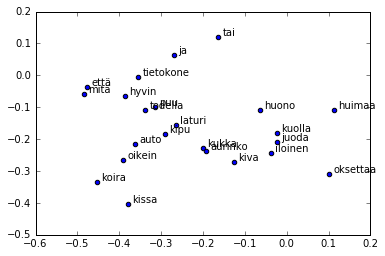

In [83]:
%matplotlib inline
import lwvlib
import sklearn.decomposition
import sklearn.preprocessing
import matplotlib.pyplot as plt
import numpy as np

#Loads in a matrix of 200-dimensional Finnish vectors, 70K most common words
wv=lwvlib.load("pb34_wf_200_v2.bin",70000,70000)
wv.vectors=sklearn.preprocessing.normalize(wv.vectors, norm='l2') #Normalize

words=u"koira,kissa,tietokone,laturi,kuolla,juoda,auto,puu,kukka,kipu,huono,huimaa,oksettaa,kiva,iloinen,aurinko,ja,tai,mitä,\
että,oikein,todella,hyvin".split(u",")
#Look up the row numbers for the words in the matrix
word_indices=list(wv[x] for x in words)
#2D projection of the data
pca2=sklearn.decomposition.PCA(2)
vectors2d=pca2.fit_transform(wv.vectors)
#Plot the vectors
plt.scatter(vectors2d[word_indices,0],vectors2d[word_indices,1])
for widx,w in zip(word_indices,words):
    plt.annotate(s=w,xy=vectors2d[widx],xytext=vectors2d[widx]+(0.01,0.005))
    
wv_fin,words_fin,word_indices_fin=wv,words,word_indices

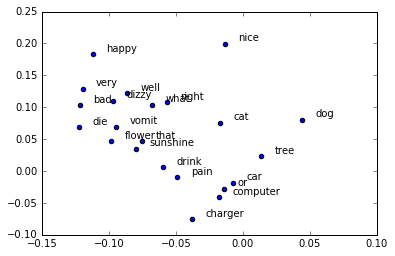

In [84]:
#...and let's try for English

#Loads in a matrix of 300-dimensional English vectors, 70K most common words
wv=lwvlib.load("GoogleNews-vectors-negative300.bin",70000,70000)
wv.vectors=sklearn.preprocessing.normalize(wv.vectors, norm='l2') #Normalize
words=u"dog,cat,computer,charger,die,drink,car,tree,flower,pain,bad,dizzy,vomit,nice,happy,sunshine,or,what,that,right,very,well".split(u",")
#Look up the row numbers for the words in the matrix
word_indices=list(wv[x] for x in words)
#2D projection of the data
pca2=sklearn.decomposition.PCA(2)
vectors2d=pca2.fit_transform(wv.vectors)
#Plot the vectors
plt.scatter(vectors2d[word_indices,0],vectors2d[word_indices,1])
for widx,w in zip(word_indices,words):
    plt.annotate(s=w,xy=vectors2d[widx],xytext=vectors2d[widx]+(0.01,0.005))

# Clustering words

The vectors of the words of course can be clustered. All you need is a way to measure their similarity. Usually we'd use the cosine similarity but `sklearn` only gives us the Eucledian distance for K-means, so let's go with that, the results will be okay.

In [77]:
import sklearn.cluster
k=sklearn.cluster.MiniBatchKMeans(batch_size=5000,n_clusters=100)
distances=k.fit_transform(wv_fin.vectors)
print distances.shape


(70000, 100)


In [85]:
print zip(words_fin,k.labels_[word_indices_fin]) #Cluster label for each word
#Maybe we want to print it in a nicer format
d={} # key:label  value:listofwords
for word,label in zip(words_fin,k.labels_[word_indices_fin]):
    d.setdefault(label,[]).append(word)
for label,label_words in sorted(d.items()):
    print label, u",".join(label_words)


[(u'koira', 14), (u'kissa', 14), (u'tietokone', 45), (u'laturi', 45), (u'kuolla', 3), (u'juoda', 3), (u'auto', 68), (u'puu', 84), (u'kukka', 84), (u'kipu', 41), (u'huono', 11), (u'huimaa', 28), (u'oksettaa', 31), (u'kiva', 18), (u'iloinen', 76), (u'aurinko', 84), (u'ja', 82), (u'tai', 82), (u'mit\xe4', 82), (u'ett\xe4', 82), (u'oikein', 82), (u'todella', 82), (u'hyvin', 86)]
3 kuolla,juoda
11 huono
14 koira,kissa
18 kiva
28 huimaa
31 oksettaa
41 kipu
45 tietokone,laturi
68 auto
76 iloinen
82 ja,tai,mitä,että,oikein,todella
84 puu,kukka,aurinko
86 hyvin


## ...same for English

You can get vectors for English vocabulary for example here: https://code.google.com/archive/p/word2vec/ 

In [91]:
k=sklearn.cluster.MiniBatchKMeans(batch_size=5000,n_clusters=70)
distances=k.fit_transform(wv.vectors)
print distances.shape
print zip(words,k.labels_[word_indices]) #Cluster label for each word
#Maybe we want to print it in a nicer format
d={} # key:label  value:listofwords
for word,label in zip(words,k.labels_[word_indices]):
    d.setdefault(label,[]).append(word)
for label,label_words in sorted(d.items()):
    print label, u",".join(label_words)


(70000, 70)
[(u'dog', 39), (u'cat', 39), (u'computer', 23), (u'charger', 49), (u'die', 46), (u'drink', 9), (u'car', 49), (u'tree', 13), (u'flower', 9), (u'pain', 63), (u'bad', 7), (u'dizzy', 63), (u'vomit', 7), (u'nice', 18), (u'happy', 42), (u'sunshine', 18), (u'or', 42), (u'what', 42), (u'that', 42), (u'right', 42), (u'very', 42), (u'well', 42)]
7 bad,vomit
9 drink,flower
13 tree
18 nice,sunshine
23 computer
39 dog,cat
42 happy,or,what,that,right,very,well
46 die
49 charger,car
63 pain,dizzy


The clusters above are built on 70K words, how about we try just with our example words?

In [106]:
k=sklearn.cluster.MiniBatchKMeans(batch_size=5000,n_clusters=7)
distances=k.fit_transform(wv_fin.vectors[word_indices_fin])
d={} # key:label  value:listofwords
for word,label in zip(words_fin,k.labels_):
    d.setdefault(label,[]).append(word)
for label,label_words in sorted(d.items()):
    print label, u",".join(label_words)

0 oikein,todella,hyvin
1 kissa,puu,kukka,kipu,aurinko
2 huono,kiva,iloinen
3 ja,tai,mitä,että
4 kuolla,juoda,oksettaa
5 huimaa
6 koira,tietokone,laturi,auto


In [98]:
k=sklearn.cluster.MiniBatchKMeans(batch_size=5000,n_clusters=5)
distances=k.fit_transform(wv.vectors[word_indices])
d={} # key:label  value:listofwords
for word,label in zip(words,k.labels_):
    d.setdefault(label,[]).append(word)
for label,label_words in sorted(d.items()):
    print label, u",".join(label_words)

0 computer
1 dog,cat,charger,car,tree,flower,vomit,sunshine
2 bad,nice,happy,well
3 drink
4 die,pain,dizzy,or,what,that,right,very


# Clustering documents

So we can cluster words. Sweet. How about whole documents? One way to cluster documents is to produce their vector representation, much like we had for the words, and then cluster them as before. So we need vectors for documents. There's many ways to do that, some fancy, some less so, but one simple option is to average the vectors of the words in the documents. Let's try.

Here's our all-time favorite Donald Trump tweets, each tagged, like this:

``
1       Why     _       WRB     _       _       _
2       the     _       DT      _       _       _
3       Supporters      _       NN      _       _       _
4       of      _       IN      _       _       _
5       Bernie  _       NNP     _       _       _
6       Sanders _       NNP     _       _       _
7       and     _       CC      _       _       _
8       Donald  _       NNP     _       _       _
9       Trump   _       NNP     _       _       _
10      are     _       VBP     _       _       _
11      Foretelling     _       VBG     _       _       _
12      the     _       DT      _       _       _
13      End     _       NN      _       _       _
14      of      _       IN      _       _       _
15      the     _       DT      _       _       _
16      35      _       CD      _       _       _
17      Year    _       NN      _       _       _
18      Bull    _       NNP     _       _       _
19      Market  _       NNP     _       _       _
20      in      _       IN      _       _       _
21      Bonds   _       NNP     _       _       _
22      https://t.co/2iDn4WqGU5 _       URL     _       _       _
``

In [13]:
import codecs
def read_conll(f):
    sent=[]
    comment=[]
    for line in f:
        line=line.strip()
        if not line: # new sentence
            if sent:
                yield comment,sent
            comment=[]
            sent=[]
        elif line.startswith(u"#"):
            comment.append(line)
        else: #normal line
            sent.append(line.split(u"\t"))
    else:
        if sent:
            yield comment, sent
            
with codecs.open("trump2000.txt.conll","r","utf-8") as f:
    tweets=list(sent for comment,sent in read_conll(f) if not sent[0][1].startswith(u"RT")) #ignore retweets


In [14]:
print tweets[0] #each tweet is one sentence
print
print u" ".join(line[1] for line in tweets[0])


[[u'1', u'Why', u'_', u'WRB', u'_', u'_', u'_'], [u'2', u'the', u'_', u'DT', u'_', u'_', u'_'], [u'3', u'Supporters', u'_', u'NN', u'_', u'_', u'_'], [u'4', u'of', u'_', u'IN', u'_', u'_', u'_'], [u'5', u'Bernie', u'_', u'NNP', u'_', u'_', u'_'], [u'6', u'Sanders', u'_', u'NNP', u'_', u'_', u'_'], [u'7', u'and', u'_', u'CC', u'_', u'_', u'_'], [u'8', u'Donald', u'_', u'NNP', u'_', u'_', u'_'], [u'9', u'Trump', u'_', u'NNP', u'_', u'_', u'_'], [u'10', u'are', u'_', u'VBP', u'_', u'_', u'_'], [u'11', u'Foretelling', u'_', u'VBG', u'_', u'_', u'_'], [u'12', u'the', u'_', u'DT', u'_', u'_', u'_'], [u'13', u'End', u'_', u'NN', u'_', u'_', u'_'], [u'14', u'of', u'_', u'IN', u'_', u'_', u'_'], [u'15', u'the', u'_', u'DT', u'_', u'_', u'_'], [u'16', u'35', u'_', u'CD', u'_', u'_', u'_'], [u'17', u'Year', u'_', u'NN', u'_', u'_', u'_'], [u'18', u'Bull', u'_', u'NNP', u'_', u'_', u'_'], [u'19', u'Market', u'_', u'NNP', u'_', u'_', u'_'], [u'20', u'in', u'_', u'IN', u'_', u'_', u'_'], [u'21', u'B

Let us sum up the vectors of all relevant words in each tweet



In [127]:

import re
import sklearn.preprocessing
ofinterest=re.compile(u".*")#re.compile(u"^JJ")#re.compile(u"^(JJ|N.*|VB.*|RB)$")
tweet_vectors=np.zeros((len(tweets),wv.vectors.shape[1])) #matrix of zeroes, 2000x300
print tweet_vectors.shape #So we have 2000 tweets and 300-dimensional vectors, fair enough
for i,tweet in enumerate(tweets):
    counter=0
    for line in tweet:
        if not ofinterest.match(line[3]):
            continue
        word=line[1] #the usual conll parsing thing
        row_idx=wv.get(word.lower()) #look-up the lowercase version
        if row_idx is not None: #many of these words are not in the vector model, then we get a None
            tweet_vectors[i]+=wv.vectors[row_idx]
            counter+=1 #how many of these we get
    if counter>0:
        tweet_vectors[i]/=counter #taking the average
tweet_vectors_norm=sklearn.preprocessing.normalize(tweet_vectors, norm='l2')
print tweet_vectors_norm

(956, 300)
[[ 0.05092374  0.07404894  0.04266264 ...,  0.01324433  0.04335124
  -0.03092886]
 [ 0.01502192  0.045572   -0.05028174 ..., -0.05578269  0.01211542
  -0.02073303]
 [ 0.03011549  0.06716104 -0.02680386 ..., -0.10697137 -0.00298901
  -0.04263444]
 ..., 
 [ 0.03911913  0.05277263  0.06832199 ..., -0.08445359  0.0182781
  -0.05951379]
 [ 0.00995169  0.04334181  0.02136517 ..., -0.04149036  0.09717504
  -0.02065628]
 [ 0.07954239 -0.01065946  0.03772106 ..., -0.03163826  0.00785335
  -0.0551415 ]]


In [126]:
#And now we can cluster as before

k=sklearn.cluster.MiniBatchKMeans(n_clusters=3, batch_size=800)
distances=k.fit_transform(tweet_vectors_norm)
nearest=np.argpartition(distances,10,axis=0)[:10] #the nearest tweets for every cluster, in no particular order

tweet_texts=list(u" ".join(l[1] for l in tweet) for tweet in tweets)
for cluster_num,cluster in enumerate(nearest.T):
    print "**************", cluster_num,"***********"
    for tweet_id in cluster:
        print ">> ",tweet_id,">> ",tweet_texts[tweet_id]
    print
    print


************** 0 ***********
>>  454 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/YHGS5L8dlr
>>  452 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/lbo3bkHxxd
>>  460 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/2YuUymzefn
>>  459 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/QUkxbf7ata
>>  458 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/epBycLxxTn
>>  457 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/Rhs9Cn3UvY
>>  456 >>  Photos : Donald Trump May Not Be A Racist , See Beautiful Leaked Neyked Pics Of His ... > > > https://t.co/WpZOuLQ24G
>>  455 >>  Photos : Donald Trump May Not Be A Racist , See B